## Import Necessary Libraries

In [28]:
import pandas as pd
import glob
import os
import sklearn
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

## Read data from files and choosing features and labels

In [29]:
dataset = pd.read_csv('created_dataset/EPL_data_augmented_last_5_matches.csv', index_col=None, header=0)
start = 0
finish = len(dataset)
df_features = dataset.iloc[start:finish, 12:28]
df_features = df_features.interpolate(method='linear')
result = dataset['FTR'][start:finish]



In [30]:
dataset.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HC,...,total_AST_got_5,total_HST_5,total_HST_got_5,total_AC_5,total_AC_got_5,total_HC_5,total_HC_got_5,B365H,B365A,B365D
0,Aston Villa,Bolton,2,2,D,3,13,2,6,7,...,0,0,0,0,0,0,0,2.30,3.00,3.25
1,Everton,Man United,0,2,A,10,12,5,5,8,...,0,0,0,0,0,0,0,5.00,1.72,3.40
2,Fulham,Birmingham,0,0,D,15,7,7,4,6,...,0,0,0,0,0,0,0,2.37,2.87,3.25
3,Man City,West Brom,0,0,D,15,13,8,3,3,...,0,0,0,0,0,0,0,1.72,5.00,3.40
4,Middlesbrough,Liverpool,0,0,D,4,16,2,7,5,...,0,0,0,0,0,0,0,2.87,2.40,3.20


<Axes: >

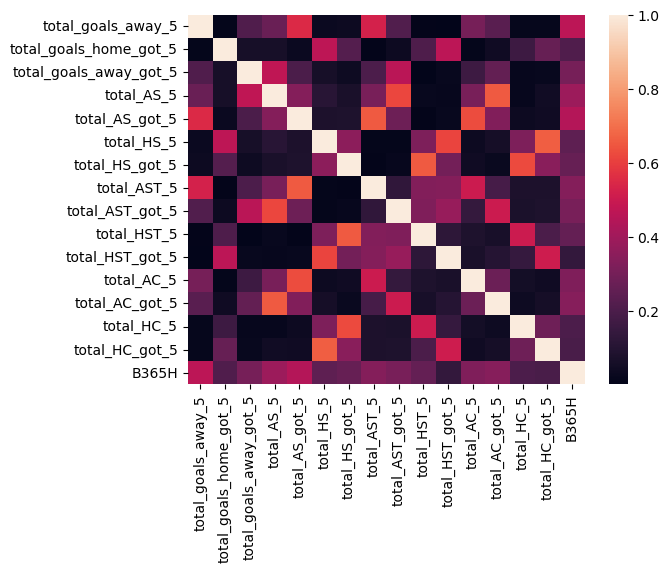

In [31]:
# Print out the correlation matrix
sns.heatmap(df_features.corr().abs())

<Axes: >

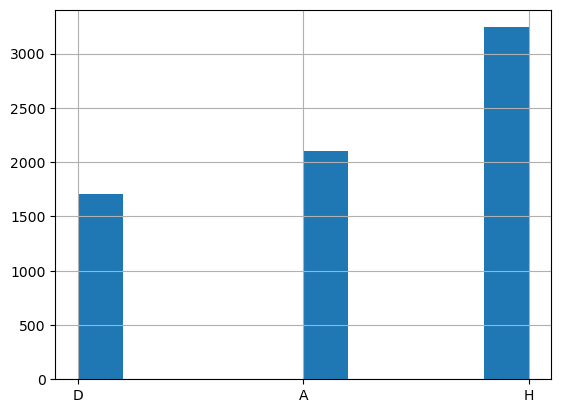

In [32]:
result.hist()


In [33]:
# Create correlation matrix
corr_matrix = df_features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
df_features.drop(to_drop, axis=1, inplace=True)

In [34]:
df_features.head()

,total_goals_away_5,total_goals_home_got_5,total_goals_away_got_5,total_AS_5,total_AS_got_5,total_HS_5,total_HS_got_5,total_AST_5,total_AST_got_5,total_HST_5,total_HST_got_5,total_AC_5,total_AC_got_5,total_HC_5,total_HC_got_5,B365H
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.30
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.00
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.37
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.72
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.87


In [35]:
## Transform to numpy array
result = pd.factorize(result)
print(result)
features = np.array(df_features)
scaler = Normalizer()

features = scaler.fit_transform(features)
result = np.array(result[0])
train_size = int(len(features) * 0.8)
X_train, X_val = features[:train_size], features[train_size:]
y_train, y_val = result[:train_size], result[train_size:]
X_val, X_test = X_val[:len(X_val) // 2], X_val[len(X_val) // 2:]
y_val, y_test = y_val[:len(y_val) // 2], y_val[len(y_val) // 2:]

(array([0, 1, 0, ..., 0, 1, 0], dtype=int64), Index(['D', 'A', 'H'], dtype='object'))


## Function to return expected returns with specific bookmakers or maximum bet rate

In [36]:
def return_rate(y_pred, y_val, first_index, train_size):
    dataset = pd.read_csv('created_dataset/EPL_2005_2023.csv', index_col=0, header=0)
    test = []
    for i in range(0, len(y_val)):
        if(y_val[i] == y_pred[i]):
            if (y_val[i] == 0):
                test.append(dataset.iloc[first_index + train_size + i]['B365D'])
            if (y_val[i] == 1):
                test.append(dataset.iloc[first_index + train_size + i]['B365A'])    
            if (y_val[i] == 2):
                test.append(dataset.iloc[first_index + train_size + i]['B365H'])
        else:
            test.append(0)
    print(test)
    print(sum(test) / len(test))

## Train the model

### Main model

array([[<Axes: title={'center': '0'}>]], dtype=object)

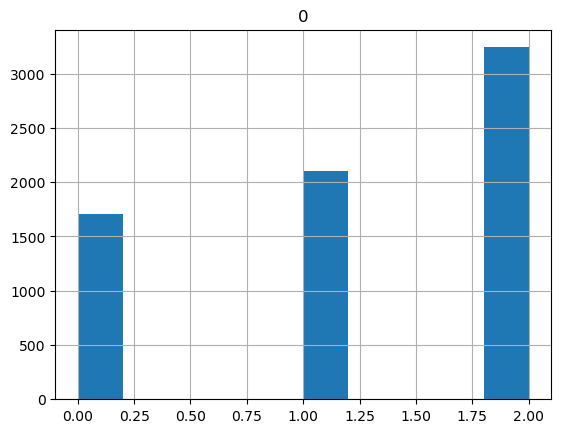

In [37]:
test_frame = pd.DataFrame(result)
test_frame.hist()

In [ ]:
## OPTIONAL: RESAMPLING
sampler = ADASYN()
X_train, y_train = sampler.fit_resample(X_train, y_train)

In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model = MLPClassifier((20, 20))
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(accuracy_score(y_pred, y_val))
return_rate(y_pred, y_val, start, train_size)
print(train_size)

0.4808510638297872
[0, 2.05, 2.2, 1.66, 1.16, 0, 1.4, 3.0, 3.3, 1.33, 0, 0, 1.4, 1.7, 3.5, 1.12, 0, 0, 1.53, 0, 3.5, 1.33, 1.95, 0, 0, 0, 1.28, 0, 0, 0, 0, 0, 1.12, 0, 1.14, 1.75, 0, 3.5, 0, 1.36, 0, 0, 0, 0, 0, 3.4, 3.5, 1.5, 1.33, 0, 0, 2.0, 1.9, 0, 1.85, 0, 0, 0, 1.08, 1.36, 2.15, 3.6, 1.53, 0, 1.28, 0, 1.95, 0, 1.61, 2.37, 1.5, 0, 0, 1.53, 0, 2.87, 2.2, 1.61, 0, 1.5, 1.72, 2.1, 0, 2.3, 2.62, 0, 0, 0, 2.5, 1.45, 0, 0, 0, 0, 0, 1.72, 1.57, 1.5, 0, 0, 0, 0, 1.44, 1.66, 0, 3.3, 0, 0, 3.3, 0, 0, 0, 0, 3.6, 1.22, 0, 0, 0, 0, 1.6, 0, 1.28, 1.5, 1.36, 0, 0, 0, 1.61, 0, 0, 0, 2.0, 0, 0, 1.36, 0, 1.45, 0, 4.2, 0, 1.45, 0, 0, 1.3, 1.85, 0, 3.75, 0, 0, 3.25, 0, 0, 1.16, 0, 0, 1.95, 0, 0, 0, 0, 0, 1.1, 2.0, 1.5, 2.55, 1.95, 0, 1.5, 0, 0, 0, 0, 0, 0, 1.7, 0, 0, 0, 2.0, 0, 0, 3.5, 1.75, 0, 0, 1.75, 3.4, 0, 1.44, 1.5, 1.44, 2.45, 3.25, 0, 0, 1.66, 1.95, 0, 1.44, 3.6, 1.9, 0, 0, 1.11, 1.85, 1.72, 0, 0, 0, 0, 0, 2.2, 0, 3.6, 0, 1.53, 0, 0, 0, 0, 0, 0, 1.57, 1.61, 2.2, 0, 0, 1.45, 0, 1.14, 0, 0, 0, 0

c:\Users\trung\anaconda3\envs\EmThanhHocMay\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\trung\AppData\Local\Temp\ipykernel_32008\2237375622.py:2: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('created_dataset/EPL_2005_2023.csv', index_col=0, header=0)


### Auxillary model

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(accuracy_score(y_pred, y_val))
return_rate(y_pred, y_val, start, train_size)

0.4765957446808511
[0, 0, 2.2, 1.66, 1.16, 0, 1.4, 3.0, 3.3, 1.33, 0, 0, 1.4, 1.7, 3.5, 1.12, 0, 0, 1.53, 0, 3.5, 1.33, 1.95, 0, 0, 0, 1.28, 0, 0, 0, 0, 0, 1.12, 0, 1.14, 1.75, 0, 0, 0, 1.36, 0, 2.4, 2.25, 0, 0, 0, 3.5, 1.5, 1.33, 0, 0, 2.0, 1.9, 3.0, 0, 0, 3.0, 2.2, 1.08, 1.36, 0, 3.6, 1.53, 0, 1.28, 3.4, 1.95, 0, 1.61, 2.37, 1.5, 1.61, 0, 1.53, 0, 2.87, 2.2, 1.61, 0, 1.5, 1.72, 2.1, 0, 2.3, 2.62, 0, 0, 0, 2.5, 1.45, 1.4, 0, 0, 0, 0, 1.72, 1.57, 1.5, 0, 0, 0, 0, 1.44, 1.66, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.6, 1.22, 0, 0, 0, 0, 1.6, 0, 1.28, 1.5, 1.36, 2.8, 0, 0, 1.61, 0, 0, 0, 0, 2.37, 0, 1.36, 0, 1.45, 0, 4.2, 0, 1.45, 0, 0, 1.3, 1.85, 0, 0, 0, 0, 0, 0, 0, 1.16, 0, 0, 1.95, 3.5, 0, 0, 0, 0, 1.1, 2.0, 1.5, 0, 0, 1.95, 1.5, 0, 3.1, 0, 0, 0, 0, 1.7, 0, 0, 0, 0, 0, 0, 3.5, 0, 0, 0, 0, 3.4, 0, 1.44, 1.5, 1.44, 0, 3.25, 0, 0, 1.66, 0, 0, 1.44, 3.6, 1.9, 0, 0, 1.11, 1.85, 1.72, 0, 0, 3.25, 0, 0, 2.2, 2.37, 3.6, 2.0, 1.53, 0, 3.5, 1.72, 1.75, 1.95, 3.25, 1.57, 1.61, 2.2, 0, 0, 1.45, 0, 1.14, 0, 

C:\Users\trung\AppData\Local\Temp\ipykernel_32008\2237375622.py:2: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('created_dataset/EPL_2005_2023.csv', index_col=0, header=0)


In [40]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print(accuracy_score(y_pred, y_val))
return_rate(y_pred, y_val, start, train_size)

0.44964539007092197
[0, 2.05, 0, 1.66, 1.16, 0, 1.4, 3.0, 0, 1.33, 0, 0, 1.4, 0, 0, 1.12, 0, 0, 1.53, 0, 3.5, 1.33, 1.95, 0, 0, 0, 1.28, 0, 0, 0, 0, 0, 1.12, 0, 1.14, 1.75, 0, 3.5, 0, 1.36, 0, 2.4, 0, 0, 0, 3.4, 0, 1.5, 1.33, 0, 6.5, 2.0, 1.9, 0, 1.85, 4.2, 0, 0, 1.08, 1.36, 2.15, 0, 0, 0, 1.28, 0, 1.95, 0, 1.61, 2.37, 0, 1.61, 0, 0, 0, 0, 2.2, 1.61, 2.7, 1.5, 1.72, 2.1, 0, 2.3, 0, 4.5, 0, 0, 2.5, 1.45, 0, 0, 0, 0, 0, 1.72, 1.57, 0, 0, 0, 0, 0, 1.44, 0, 3.3, 0, 0, 0, 0, 0, 0, 0, 0, 3.6, 1.22, 0, 3.5, 0, 0, 1.6, 0, 1.28, 1.5, 1.36, 0, 0, 0, 1.61, 2.4, 0, 0, 2.0, 0, 0, 1.36, 0, 1.45, 0, 0, 0, 1.45, 0, 0, 1.3, 0, 2.4, 0, 1.85, 0, 0, 0, 0, 1.16, 3.6, 0, 1.95, 0, 3.75, 0, 0, 3.5, 1.1, 2.0, 1.5, 0, 0, 0, 1.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.5, 0, 0, 3.3, 1.75, 3.4, 0, 1.44, 1.5, 1.44, 0, 3.25, 3.75, 0, 0, 1.95, 0, 1.44, 3.6, 1.9, 3.3, 0, 1.11, 1.85, 1.72, 0, 0, 3.25, 0, 0, 0, 2.37, 3.6, 0, 1.53, 0, 0, 0, 0, 0, 3.25, 1.57, 1.61, 2.2, 0, 0, 1.45, 0, 1.14, 5.0, 0, 0, 0, 0, 1.5, 1.8, 0,

C:\Users\trung\AppData\Local\Temp\ipykernel_32008\2237375622.py:2: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('created_dataset/EPL_2005_2023.csv', index_col=0, header=0)


In [41]:
inference = [0] * 16
home_team_name = 'Man City'
away_team_name = 'Man United'
# Features are: total_goals_home_4	total_goals_away_4	total_goals_home_got_4	total_goals_away_got_4	total_AS_4	total_AS_got_4	total_HS_4	total_HS_got_4	total_AST_4	total_AST_got_4	total_HST_4	total_HST_got_4	total_AC_4	total_AC_got_4	total_HC_4	total_HC_got_4
# These are the statistics of the last 4 games played by home and away teams.
# 'got' means the amount of goals/etc that the home/away teams have been scored by the opponents in the last 4 games that each team played.
# Output is [0, 1, 2], in which 0 is draw, 1 is away, 2 is home.
query_data_home = dataset[(dataset['HomeTeam'] == home_team_name) | (dataset['AwayTeam'] == home_team_name)][-5:-1]
query_data_away = dataset[(dataset['HomeTeam'] == away_team_name) | (dataset['AwayTeam'] == away_team_name)][-5:-1]
for i in range(0, 4):
    if query_data_home.iloc[i]['AwayTeam'] == home_team_name:
        inference[0] += query_data_home.iloc[i]['FTAG']
        inference[2] += query_data_home.iloc[i]['FTHG']
        inference[6] += query_data_home.iloc[i]['AS']
        inference[7] += query_data_home.iloc[i]['HS']
        inference[10] += query_data_home.iloc[i]['AST']
        inference[11] += query_data_home.iloc[i]['HST']
        inference[14] += query_data_home.iloc[i]['AC']
        inference[15] += query_data_home.iloc[i]['HC']
    if query_data_home.iloc[i]['HomeTeam'] == home_team_name:
        inference[0] += query_data_home.iloc[i]['FTHG']
        inference[2] += query_data_home.iloc[i]['FTAG']
        inference[6] += query_data_home.iloc[i]['HS']
        inference[7] += query_data_home.iloc[i]['AS']
        inference[10] += query_data_home.iloc[i]['HST']
        inference[11] += query_data_home.iloc[i]['AST']
        inference[14] += query_data_home.iloc[i]['HC']
        inference[15] += query_data_home.iloc[i]['AC']
    if query_data_home.iloc[i]['HomeTeam'] == away_team_name:
        inference[1] += query_data_home.iloc[i]['FTHG']
        inference[3] += query_data_home.iloc[i]['FTAG']
        inference[4] += query_data_home.iloc[i]['HS']
        inference[5] += query_data_home.iloc[i]['AS']
        inference[8] += query_data_home.iloc[i]['HST']
        inference[9] += query_data_home.iloc[i]['AST']
        inference[12] += query_data_home.iloc[i]['HC']
        inference[13] += query_data_home.iloc[i]['AC']
    if query_data_home.iloc[i]['AwayTeam'] == away_team_name:
        inference[1] += query_data_home.iloc[i]['FTAG']
        inference[3] += query_data_home.iloc[i]['FTHG']
        inference[4] += query_data_home.iloc[i]['AS']
        inference[5] += query_data_home.iloc[i]['HS']
        inference[8] += query_data_home.iloc[i]['AST']
        inference[9] += query_data_home.iloc[i]['HST']
        inference[12] += query_data_home.iloc[i]['AC']
        inference[13] += query_data_home.iloc[i]['HC']
print(model.predict(np.array(inference).reshape(1, -1)))


[1]


In [42]:
query_data_home['HomeTeam']

6998       Luton
7002    Man City
7025     Everton
7031    Man City
Name: HomeTeam, dtype: object

In [43]:
# # Save the model to file
# import joblib
# filename = 'trained_model/prediction_with_FCNN_last_4_matches.pkl'
# joblib.dump(model, filename)